# Improved balance data


In [1]:
import model
import importlib 
importlib.reload(model)

<module 'model' from '/export/home/math/angranl/Documents/FastDataset/model.py'>

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils import data
from torch.utils.data.sampler import SubsetRandomSampler

import numpy as np
import data
from dataset import rdDataset
from model import rdcnn_3
from math import log10


# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:1" if use_cuda else "cpu")
# cudnn.benchmark = True
path = './data'

# Parameters

params = {'test_split': .25,
          'shuffle_dataset': True,
          'batchsize': 32,
          'testBatchsize': 10,
          'random_seed': 42,
          'numworkers':16}
max_epoches = 100
learning_rate = 1e-3
drop_rate = 0.0

print('===> Loading datasets')
# Load All Dataset
dataset = rdDataset(path)

# Creating data indices for training and validation splits:
training_data_loader, testing_data_loader = data.DatasetSplit(dataset, **params)

print('===> Building model')
model = rdcnn_3(drop_rate).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=1e-5)



def train(epoch):
    epoch_loss = 0
    for iteration, batch in enumerate(training_data_loader, 1):
        input, target = batch[0].to(device, torch.float), batch[1].to(device, torch.float)
        optimizer.zero_grad()
        loss = criterion(model(input), target)
        epoch_loss += loss.item()
        loss.backward()
        optimizer.step()

#         print("===> Epoch[{}]({}/{}): Loss: {:.4f}".format(epoch, iteration, len(training_data_loader), loss.item()))

    print("===> Epoch {} Complete: Avg. Loss: {:.4f}".format(epoch, epoch_loss / len(training_data_loader)))
    return epoch, epoch_loss / len(training_data_loader)
    
def test():
    avg_error = 0
    avg_loss = 0
    with torch.no_grad():
        for batch in testing_data_loader:
            input, target = batch[0].to(device, torch.float), batch[1].to(device, torch.float)

            prediction = model(input)
            tmp_error = 0
#             print(len(prediction))
            for j in range(len(prediction)):
                tmp_error += torch.mean((prediction[j]-target[j])**2/torch.max(target[j]))
            avg_error += tmp_error / len(prediction)
            mse = criterion(prediction, target)
            avg_loss += mse
    print("===> Avg. Loss: {:.4f} ".format(avg_loss / len(testing_data_loader)))
    print("===> Avg. Error: {:.4f} ".format(avg_error / len(testing_data_loader)))
    return avg_loss / len(testing_data_loader),avg_error / len(testing_data_loader)

def checkpoint(epoch):
    model_out_path = "./checkpoint_largedata3/model_epoch_{}.pth".format(epoch)
    torch.save(model, model_out_path)
    print("Checkpoint saved to {}".format(model_out_path))
    
    

===> Loading datasets
===> Building model


In [3]:
L_train_loss = []
L_test_loss = []
L_test_error = []
for epoch in range(1, max_epoches + 1):
    train_loss = train(epoch)
    test_loss,test_error = test()
    checkpoint(epoch)
#     data.TestErrorPlot(model,device, testing_data_loader)
    L_train_loss.append(train_loss)
    L_test_loss.append(test_loss)
    L_test_error.append(test_error)

===> Epoch 1 Complete: Avg. Loss: 0.0290
===> Avg. Loss: 0.0266 
===> Avg. Error: 0.0318 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_1.pth
===> Epoch 2 Complete: Avg. Loss: 0.0210
===> Avg. Loss: 0.0154 
===> Avg. Error: 0.0168 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_2.pth
===> Epoch 3 Complete: Avg. Loss: 0.0149
===> Avg. Loss: 0.0145 
===> Avg. Error: 0.0163 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_3.pth
===> Epoch 4 Complete: Avg. Loss: 0.0134
===> Avg. Loss: 0.0127 
===> Avg. Error: 0.0143 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_4.pth
===> Epoch 5 Complete: Avg. Loss: 0.0123
===> Avg. Loss: 0.0117 
===> Avg. Error: 0.0134 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_5.pth
===> Epoch 6 Complete: Avg. Loss: 0.0112
===> Avg. Loss: 0.0115 
===> Avg. Error: 0.0129 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_6.pth
===> Epoch 7 Complete: Avg. Loss: 0.0103
===> Avg. Loss: 0.0099 
===> Avg. Error: 0.0111

===> Epoch 55 Complete: Avg. Loss: 0.0040
===> Avg. Loss: 0.0046 
===> Avg. Error: 0.0055 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_55.pth
===> Epoch 56 Complete: Avg. Loss: 0.0040
===> Avg. Loss: 0.0041 
===> Avg. Error: 0.0048 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_56.pth
===> Epoch 57 Complete: Avg. Loss: 0.0041
===> Avg. Loss: 0.0054 
===> Avg. Error: 0.0064 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_57.pth
===> Epoch 58 Complete: Avg. Loss: 0.0041
===> Avg. Loss: 0.0069 
===> Avg. Error: 0.0084 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_58.pth
===> Epoch 59 Complete: Avg. Loss: 0.0039
===> Avg. Loss: 0.0044 
===> Avg. Error: 0.0052 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_59.pth
===> Epoch 60 Complete: Avg. Loss: 0.0042
===> Avg. Loss: 0.0039 
===> Avg. Error: 0.0047 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_60.pth
===> Epoch 61 Complete: Avg. Loss: 0.0039
===> Avg. Loss: 0.0039 
===> Avg. 

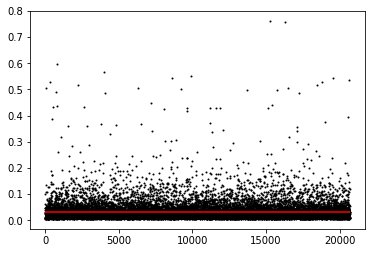

In [13]:
import importlib 
importlib.reload(data)
data.TestErrorPlot(model,device, testing_data_loader)

In [5]:
from matplotlib import pyplot as plt
prediction_L = []
target_L = []
with torch.no_grad():
    for batch in testing_data_loader:
        input, target = batch[0].to(device, torch.float), batch[1].to(device, torch.float)

        prediction = model(input)
        prediction_L.append(prediction)
        target_L.append(target)

In [24]:
prediction.size()

torch.Size([5, 1, 21, 21])

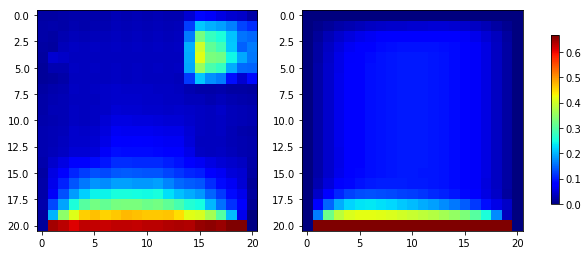

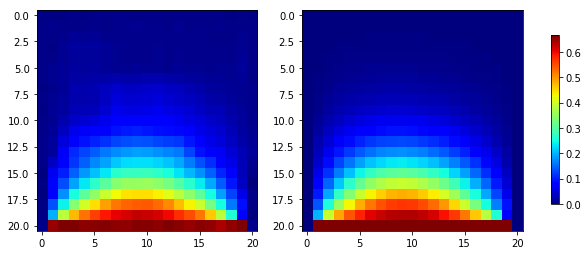

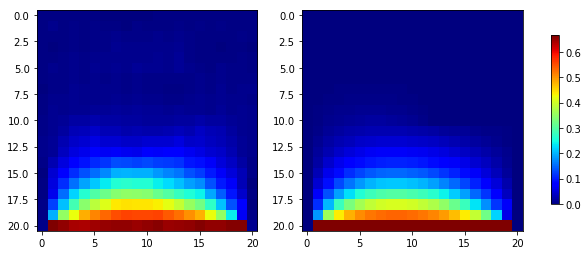

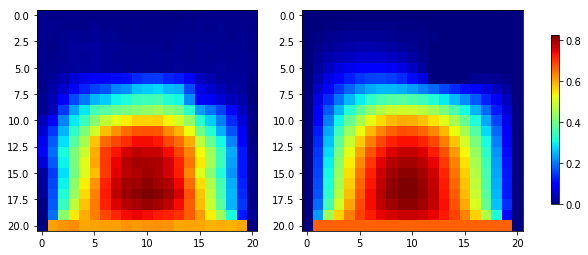

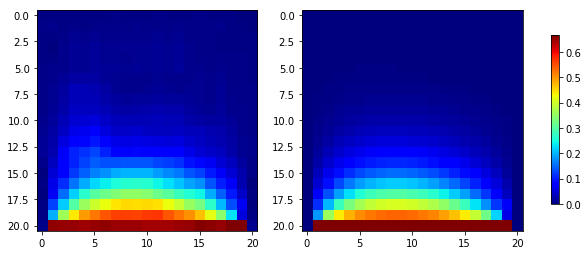

In [6]:
for t in range(len(prediction)):
    fig, ax = plt.subplots(1,2, figsize=(10,5))

    im = ax[0].imshow(prediction[t][0].cpu(),cmap = "jet")
    im = ax[1].imshow(target[t][0].cpu(),cmap = "jet")

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.84, 0.27, 0.01, 0.47])
    fig.colorbar(im, cax=cbar_ax)

plt.show()

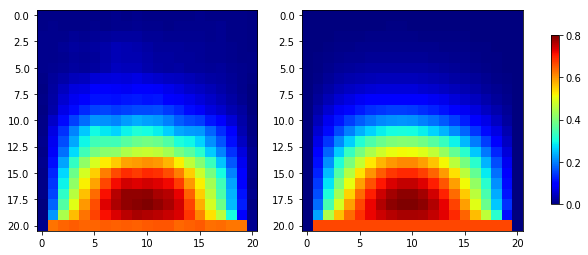

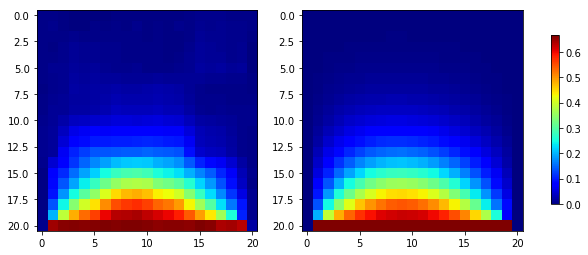

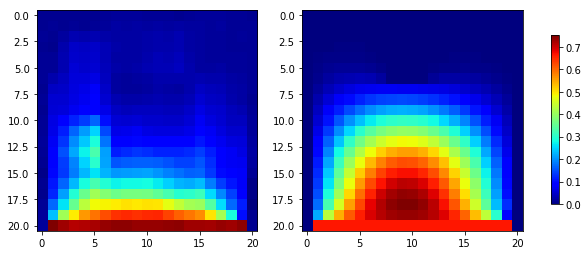

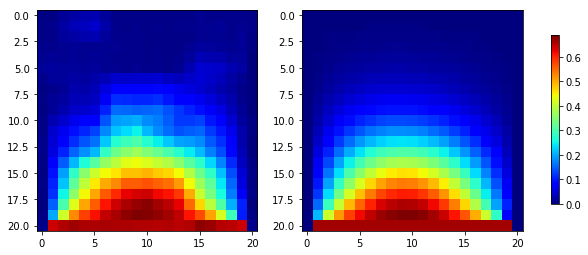

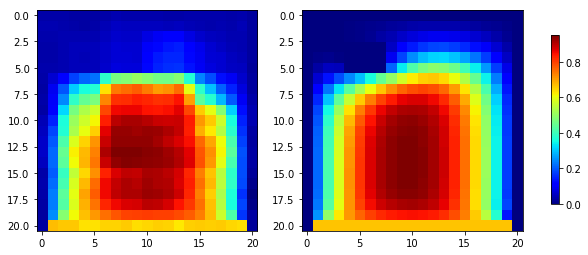

In [7]:
for t in range(len(prediction)):
    fig, ax = plt.subplots(1,2, figsize=(10,5))

    im = ax[0].imshow(prediction_L[0][t][0].cpu(),cmap = "jet")
    im = ax[1].imshow(target_L[0][t][0].cpu(),cmap = "jet")

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.84, 0.27, 0.01, 0.47])
    fig.colorbar(im, cax=cbar_ax)

plt.show()

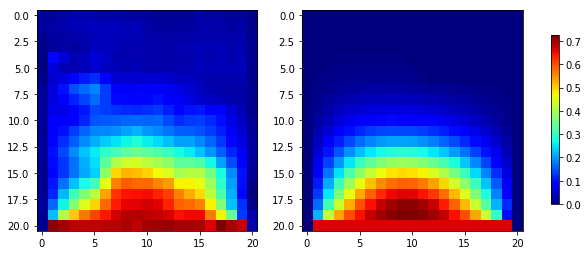

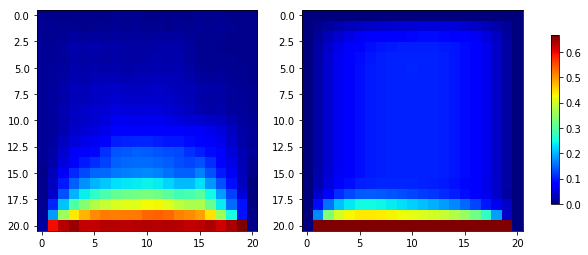

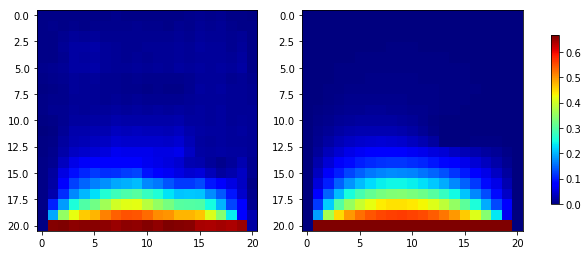

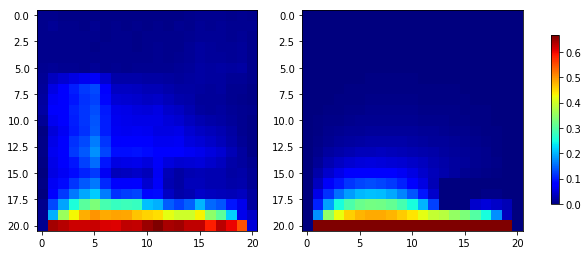

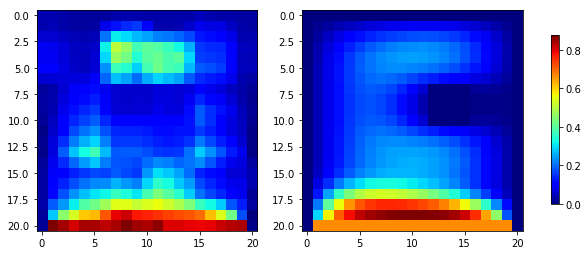

In [8]:
for t in range(len(prediction)):
    fig, ax = plt.subplots(1,2, figsize=(10,5))

    im = ax[0].imshow(prediction_L[1][t][0].cpu(),cmap = "jet")
    im = ax[1].imshow(target_L[1][t][0].cpu(),cmap = "jet")

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.84, 0.27, 0.01, 0.47])
    fig.colorbar(im, cax=cbar_ax)

plt.show()

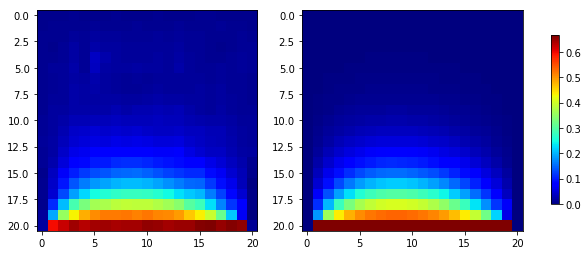

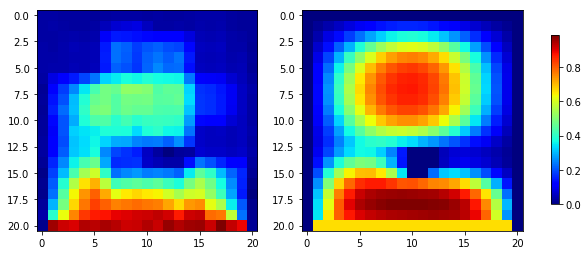

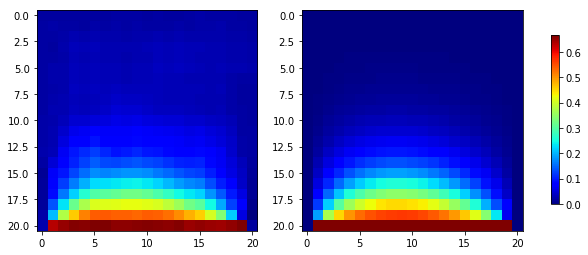

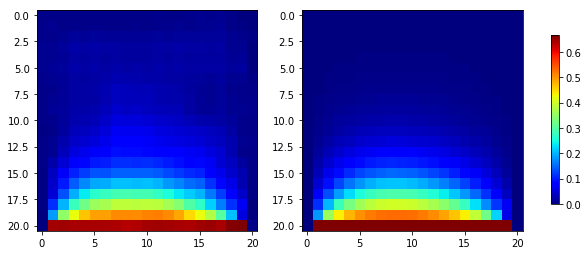

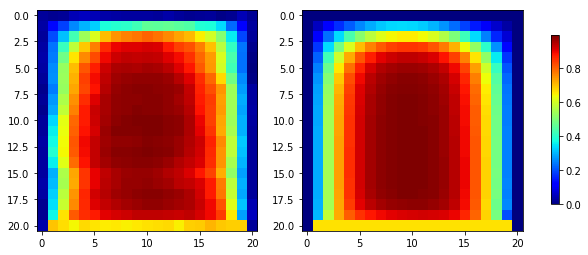

In [9]:
for t in range(len(prediction)):
    fig, ax = plt.subplots(1,2, figsize=(10,5))

    im = ax[0].imshow(prediction_L[2][t][0].cpu(),cmap = "jet")
    im = ax[1].imshow(target_L[2][t][0].cpu(),cmap = "jet")

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.84, 0.27, 0.01, 0.47])
    fig.colorbar(im, cax=cbar_ax)

plt.show()

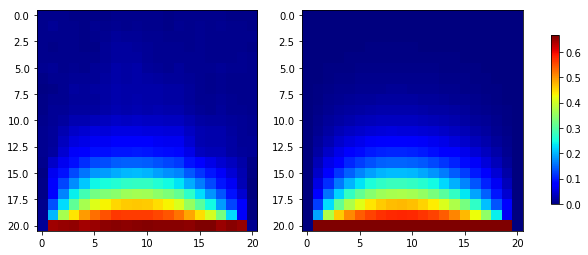

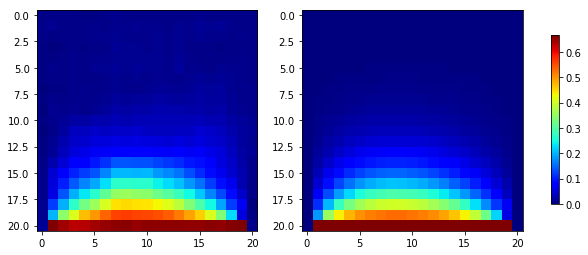

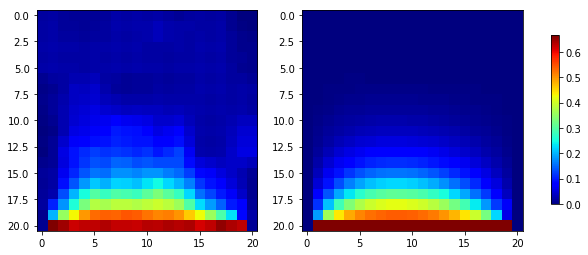

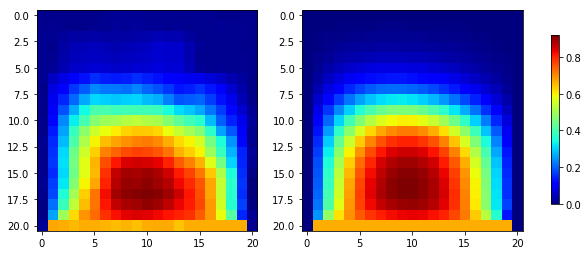

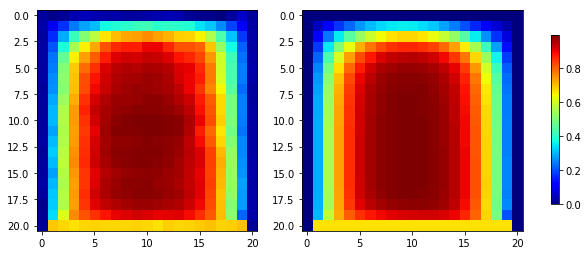

In [10]:
for t in range(len(prediction)):
    fig, ax = plt.subplots(1,2, figsize=(10,5))

    im = ax[0].imshow(prediction_L[3][t][0].cpu(),cmap = "jet")
    im = ax[1].imshow(target_L[3][t][0].cpu(),cmap = "jet")

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.84, 0.27, 0.01, 0.47])
    fig.colorbar(im, cax=cbar_ax)

plt.show()

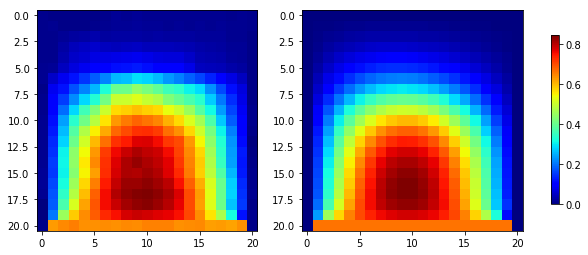

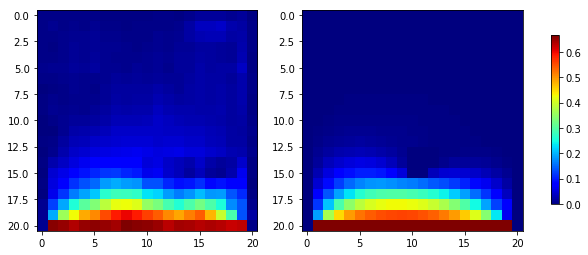

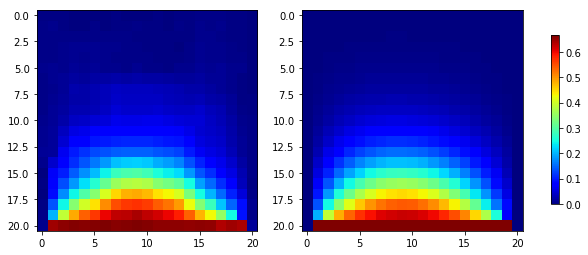

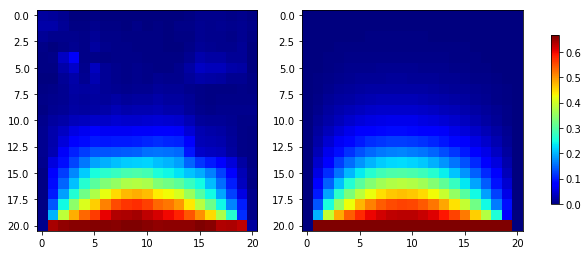

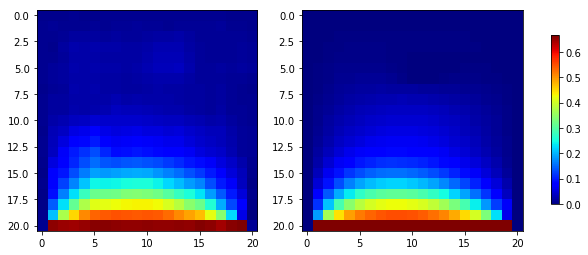

In [11]:
for t in range(len(prediction)):
    fig, ax = plt.subplots(1,2, figsize=(10,5))

    im = ax[0].imshow(prediction_L[4][t][0].cpu(),cmap = "jet")
    im = ax[1].imshow(target_L[4][t][0].cpu(),cmap = "jet")

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.84, 0.27, 0.01, 0.47])
    fig.colorbar(im, cax=cbar_ax)

plt.show()

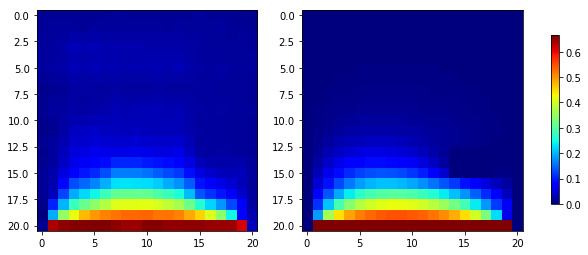

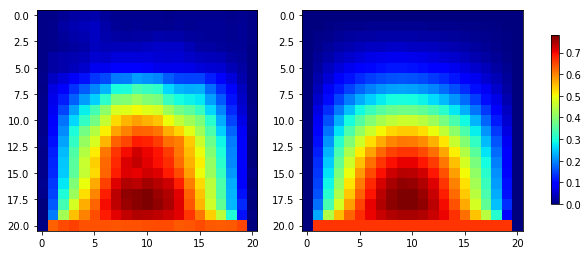

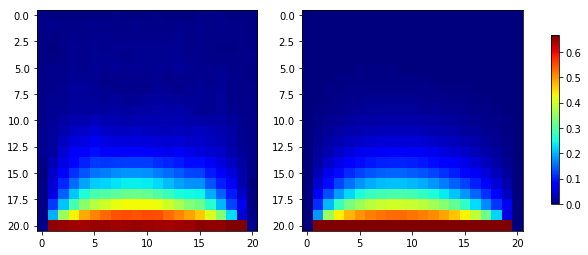

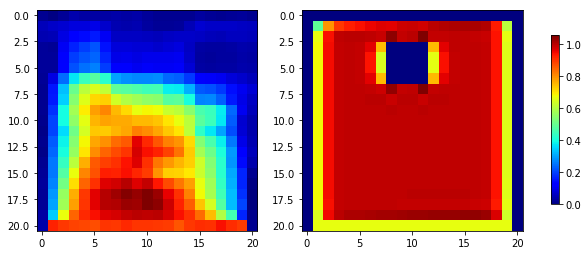

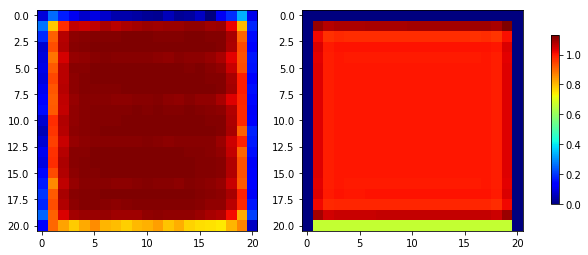

In [12]:
for t in range(len(prediction)):
    fig, ax = plt.subplots(1,2, figsize=(10,5))

    im = ax[0].imshow(prediction_L[5][t][0].cpu(),cmap = "jet")
    im = ax[1].imshow(target_L[5][t][0].cpu(),cmap = "jet")

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.84, 0.27, 0.01, 0.47])
    fig.colorbar(im, cax=cbar_ax)

plt.show()